In [1]:
import tensorflow as tf
import numpy
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
#import data into tensorflow dataset object
training_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Corns/train",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 9120 files belonging to 4 classes.


In [4]:
train_class_names = training_set.class_names
train_class_names

['Corn Common Rust',
 'Corn Gray Leaf Spot',
 'Corn Healthy',
 'Corn Northern Leaf Blight']

In [5]:
len(training_set)

285

(256, 256, 3)


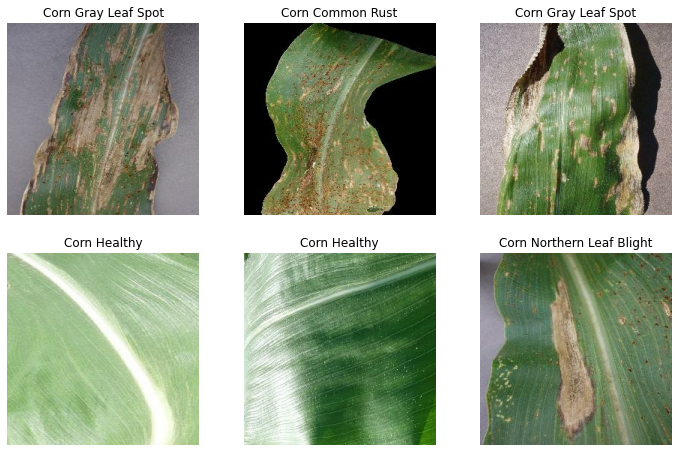

In [6]:
#let's now try to visualize our images with their label
plt.figure(figsize=(12,12))
for image_batch, label_batch in training_set.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(train_class_names[label_batch[i]])
        #plt.title(label_batch[i].numpy())
        
        
    print(image_batch[0].shape)

In [7]:
#let's writre a function dto split our data automatically
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1, shuffle =True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 1200)
        
    train_size = int(train_split*ds_size)
    val_size = int(ds_size*val_split)
    
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    return train_data, test_data, val_data 

In [8]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(training_set)
len(train_ds), len(test_ds), len(val_ds)

(228, 29, 28)

In [9]:
#This is made to optimize the moderl performance so that tthe model trains better because of the pipeline stuff...
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#Now let's scale our images AKA data normalization
#And also the resize layer will take care of resizing the images submitted the model during training even if they are not of size 256x256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [11]:
#Here we will perform the data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model_corn= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_corn.build(input_shape=input_shape)

In [13]:
model_corn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model_corn.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
)

Epoch 1/10
228/228 [==============================] - 64s 207ms/step - loss: 0.5688 - accuracy: 0.7478 - val_loss: 0.3422 - val_accuracy: 0.8616
Epoch 2/10
228/228 [==============================] - 36s 157ms/step - loss: 0.2672 - accuracy: 0.8876 - val_loss: 0.2988 - val_accuracy: 0.8962
Epoch 3/10
228/228 [==============================] - 33s 144ms/step - loss: 0.1963 - accuracy: 0.9231 - val_loss: 0.1950 - val_accuracy: 0.9252
Epoch 4/10
228/228 [==============================] - 33s 143ms/step - loss: 0.1909 - accuracy: 0.9302 - val_loss: 0.2191 - val_accuracy: 0.9208
Epoch 5/10
228/228 [==============================] - 32s 142ms/step - loss: 0.1907 - accuracy: 0.9283 - val_loss: 0.1566 - val_accuracy: 0.9475
Epoch 6/10
228/228 [==============================] - 32s 142ms/step - loss: 0.1489 - accuracy: 0.9437 - val_loss: 0.1760 - val_accuracy: 0.9275
Epoch 7/10
228/228 [==============================] - 32s 142ms/step - loss: 0.1424 - accuracy: 0.9482 - val_loss: 0.1874 - val_ac

In [ ]:
#import data into tensorflow dataset object
test_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Corns/test",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

In [ ]:
test_class_names = test_set.class_names
test_class_names

In [ ]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_corn.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()

The Code Below Allows Us To Display Our Data's Confusion Matrix even if They Are Shuffled.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_corn.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)

In [ ]:
train_class_names

In [ ]:
from sklearn.metrics import classification_report
y_true = correct_labels
y_pred = predicted_labels
target_names = train_class_names
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
#The Model eveluation we'll be used to check if the obtained accuracies are the same in both the matrix and the evaluation
model_corn.evaluate(test_ds)

In [ ]:
#This is our Confusion Matrix

In [ ]:
# import libraries
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.utils.multiclass import unique_labels
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          text_size=14,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    size=text_size,
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(correct_labels, predicted_labels, train_class_names, title="Confusion Matrix")

In [ ]:
#Now We can save the model to reuse it later:
#j'ai oublié le code

In [ ]:
model_corn.save("C:/Users/q/Downloads/All_Data/saved_models/CornModel.h5")

In [ ]:
model_test = models.load_model('C:/Users/q/Downloads/All_Data/saved_models/CornModel.h5')

In [ ]:
model_test.evaluate(test_ds)

In [ ]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_test.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])